In [4]:
import yfinance as yf
import pandas_ta as ta

def import_data(stock, startDate):
    data = yf.download(stock, start=startDate, interval='1d')

    data['EMA_50'] = ta.ema(data['Close'], length=50)
    data['EMA_200'] = ta.ema(data['Close'], length=200)
    data['SMA_50'] = ta.sma(data['Close'], length=50)
    data['SMA_200'] = ta.sma(data['Close'], length=200)
    data['RSI'] = ta.rsi(data['Close'], length=14)
    # data['ATR'] = ta.atr(data['High'], data['Low'], data['Close'], length=14)

    return data

[*********************100%%**********************]  1 of 1 completed
C:\Users\18053\AppData\Local\Temp\ipykernel_13824\2343888753.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
C:\Users\18053\AppData\Local\Temp\ipykernel_13824\2343888753.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
C:\Users\18053\AppData\Local\Temp\ipykernel_13824\2343888753.py:22: Set

                  Open        High         Low       Close   Adj_Close  \
Date                                                                     
2016-10-17  213.089996  213.389999  212.169998  212.380005  185.557144   
2016-10-18  214.240005  214.309998  213.270004  213.710007  186.719116   
2016-10-19  214.020004  214.639999  213.600006  214.279999  187.217117   
2016-10-20  213.869995  214.529999  213.110001  213.880005  186.867645   
2016-10-21  213.880005  214.080002  212.759995  213.979996  186.955063   
...                ...         ...         ...         ...         ...   
2024-10-30  581.289978  583.320007  579.289978  580.010010  580.010010   
2024-10-31  575.559998  575.630005  568.440002  568.640015  568.640015   
2024-11-01  571.320007  575.549988  570.619995  571.039978  571.039978   
2024-11-04  571.179993  572.500000  567.890015  569.809998  569.809998   
2024-11-05  570.739990  576.419983  570.520020  575.499878  575.499878   

              Volume      EMA_50     

C:\Users\18053\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 117.5166 - val_loss: 115.7802
Epoch 2/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 105.7958 - val_loss: 114.9237
Epoch 3/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 56.5431 - val_loss: 112.4059
Epoch 4/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 191.2258 - val_loss: 111.7981
Epoch 5/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 61.6239 - val_loss: 110.2625
Epoch 6/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 64.4660 - val_loss: 105.2735
Epoch 7/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 143.1378 - val_loss: 111.7478
Epoch 8/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 70.8870 - val_loss: 97.6966
Epoch 9/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 195.3487 - val_loss: 113.3268
Epoch 10/10
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 187.4285 - val_loss: 112.4548
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step
[[1.4032441 ]
 [1.6139655 ]
 [1.7958378 ]
 [0.74431247]
 [1.5847402 ]
 [1.0342107 ]
 

C:\Users\18053\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


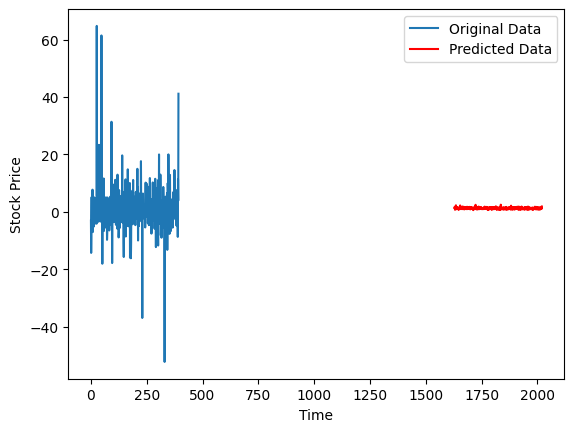

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply, Flatten

data = import_data('SPY', '2016-01-01')
data.columns = data.columns.get_level_values(0)

# Rename the columns to their appropriate names
data.rename(columns={'Adj Close': 'Adj_Close', 'Close': 'Close', 'High': 'High', 'Low': 'Low',
                   'Open': 'Open', 'Volume': 'Volume'}, inplace=True)
data = data.dropna()
print(data)

scalers = {}
for column in ['Close', 'RSI', 'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200', 'Volume']:
    scaler = MinMaxScaler(feature_range=(0, 1))
    data[column] = scaler.fit_transform(data[column].values.reshape(-1, 1))
    scalers[column] = scaler

def create_dataset(dataset, step):
    X, Y = [], []
    for i in range(len(dataset) - step - 6):
        features = dataset[['Close', 'RSI', 'SMA_50', 'SMA_200', 'EMA_50', 'EMA_200', 'Volume']].iloc[i:(i + step)].values
        
        current_price = dataset['Close'].iloc[i + step]
        future_price = dataset['Close'].iloc[i + step + 5]
        percent_change = ((future_price - current_price) / current_price) * 100
        
        X.append(features)
        Y.append(percent_change)
    return np.array(X), np.array(Y)

step = 60
X, y = create_dataset(data, step)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
# attention = AdditiveAttention(name='attention_weight')

model.add(Permute((2, 1))) 
model.add(Reshape((-1, X_train.shape[1])))
# attention_result = attention([model.output, model.output])
# multiply_layer = Multiply()([model.output, attention_result])

model.add(Permute((2, 1))) 
model.add(Reshape((-1, 50)))
model.add(Flatten())
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)
model.fit(X_train, y_train, epochs=10, batch_size=25, validation_split=0.2)

predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)

print(predictions)

# Evaluate the model
mae = mean_absolute_error(y_test, predictions)
rmse = mean_squared_error(y_test, predictions, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)  

plt.plot(y_test, label='Original Data')
plt.plot(np.arange(len(y_train) + step, len(y_train) + len(predictions) + step), predictions, label='Predicted Data', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
from backtesting import Strategy, Backtest

def get_parameters(df):
    # Define the signal function that will be used in the strategy
    def SIGNAL():
        return df['pc_change']
    
    class MA_Crossover_RSI_Strategy(Strategy):
        mysize = 1  # Trade size (100% of available cash)
        trade_age = 0
        threshold = 1

        def init(self):
            # Initialize the signal
            self.signal1 = self.I(SIGNAL)

        def next(self):
            # If no open position and a signal occurs, enter a buy order
            if abs(self.signal1) > self.threshold and not self.position:
                if self.signal1 > 0:
                    self.buy(size=self.mysize)
                else:
                    self.sell(size=self.mysize)
                # print(f"BUY at {entry_price}, Stop Loss at {stop_loss}")

            # If signal is 5 days old, close position
            if self.position:
                if self.trade_age >= 5:
                    self.position.close()
                    self.trade_age = 0
                else:
                    self.trade_age += 1

    # Run the backtest
    bt = Backtest(df, MA_Crossover_RSI_Strategy, cash=10000, margin=1/30, commission=0.01)
    results = bt.run()

    return results

In [ ]:
df = X_test
df['pc_change'] = predictions.flatten()
print(df)
get_parameters(df)

Price                       Adj Close     Close        High         Low  \
Ticker                            SPY       SPY         SPY         SPY   
Date                                                                      
2023-04-14 00:00:00+00:00  404.025665  0.542256  415.089996  410.059998   
2023-04-17 00:00:00+00:00  405.475464  0.546192  413.959991  411.089996   
2023-04-18 00:00:00+00:00  405.739899  0.546910  415.720001  412.779999   
2023-04-19 00:00:00+00:00  405.671387  0.546724  415.079987  412.160004   
2023-04-20 00:00:00+00:00  403.457550  0.540714  413.700012  410.269989   
...                               ...       ...         ...         ...   
2024-10-28 00:00:00+00:00  580.830017  0.990001  582.710022  580.520020   
2024-10-29 00:00:00+00:00  581.770020  0.992501  582.909973  578.429993   
2024-10-30 00:00:00+00:00  580.010010  0.987820  583.320007  579.289978   
2024-10-31 00:00:00+00:00  568.640015  0.957584  575.630005  568.440002   
2024-11-01 00:00:00+00:00

C:\Users\cdpea\AppData\Local\Temp\ipykernel_12796\4200691708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['pc_change'] = predictions.flatten()


TypeError: other must be a MultiIndex or a list of tuples